## Getting familiar with Pandas

In [1]:
## Pandas 
# there are several ways to change a column in a dataframe
# A short intro to pandas https://pandas.pydata.org/pandas-docs/stable/10min.html

import pandas as pd
import numpy as np
import random

In [2]:
# First step: make the dataframe
dates = pd.date_range('20130101', '20140101') #366
data = pd.DataFrame(np.random.randn(366,4), index=dates, columns=list('ABCD'))

### Exercise 1.1: Inspect the dataframe with the following commands: head(), tail(), describe.

In [3]:
# Solution
display(data.head(3))
display(data.tail(6))

data.describe()

,A,B,C,D
2013-01-01,-0.438576,-0.128285,-0.977084,0.451034
2013-01-02,-0.819362,-1.028782,0.150919,-0.789016
2013-01-03,0.455793,0.279585,-0.220317,1.300486


,A,B,C,D
2013-12-27,-1.131399,-0.924466,-0.688624,0.260585
2013-12-28,1.678003,-0.193070,0.296393,0.772755
2013-12-29,-0.837160,-2.222265,-0.662785,0.363467
2013-12-30,0.516524,0.840746,0.626200,0.169804
2013-12-31,0.197979,-0.018004,1.545806,-0.601857
2014-01-01,-1.082259,-1.090432,0.549042,1.237646


,A,B,C,D
count,366.000000,366.000000,366.000000,366.000000
mean,-0.077943,0.013931,-0.015419,-0.029574
std,0.973722,1.027557,0.998569,0.995247
min,-2.748998,-2.582725,-2.748786,-3.423076
25%,-0.718691,-0.636501,-0.687223,-0.723362
50%,-0.125528,0.073538,-0.089428,0.002564
75%,0.575481,0.684196,0.621583,0.611094
max,2.971999,3.189172,3.168718,2.905115


### Exercise 1.2:  The index is a time series, and pandas has a build-in command for re-sampling dataframes (documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html).  Use resample to get the median every 2 days and save this as a new dataframe.

In [20]:
#Solution: 
median2d = data.resample('2D').median()
median2d.head(4)

,A,B,C,D
2013-01-01,-0.628969,-0.578534,-0.413082,-0.168991
2013-01-03,-0.559541,-0.886203,0.681371,0.587827
2013-01-05,-0.170196,-0.514717,-1.082935,0.281484
2013-01-07,0.282225,0.378697,0.183115,0.430477


### Exercise 1.3: Inspect the new dataframe to see the difference in size compared to the inital dataframe.

In [21]:
#Solution: 
print("original shape of data: ", data.shape)
print("new shape of data with median: ", median2d.shape)

original shape of data:  (366, 4)
new shape of data with median:  (183, 4)


### Exercise 1.4:  Write your new dataframe to a csv file.

In [6]:
#Solution: 
median2d.to_csv('testing_median2d_week2.csv')

### Exercise 1.5: Merge the two dataframes. There are several ways to do this, see also https://pandas.pydata.org/pandas-docs/stable/merging.html.

In [22]:
# Merging to dataframes
useless_merged_data = pd.concat([data, median2d])
useless_merged_data.shape
useless_merged_data.head(4)

,A,B,C,D
2013-01-01,-0.438576,-0.128285,-0.977084,0.451034
2013-01-02,-0.819362,-1.028782,0.150919,-0.789016
2013-01-03,0.455793,0.279585,-0.220317,1.300486
2013-01-04,-1.574874,-2.051992,1.583058,-0.124832


### Exercise 1.6: There are several ways to perform actions on the dataframe columns. The dataframe has several columns containing negative values. For this exercise, do the manipulation on 2 columns using a list comprehension, and after this, using a lambda function. You can use the magic timeit to see if there is a difference between these operations.

In [26]:
# Solution
# method 1: list comprehension
%timeit data['E'] = [ abs(x) for x in data['B'] ]

316 µs ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [27]:
# method 2: lambda function
%timeit data['F'] = data['B'].apply(lambda x: abs(x) ) 

382 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Supervised learning using scikit-learn - Classification of MNIST data

### Exercise 2.1: Download the digit ('MNIST original') dataset from  mldata.org, which is a public repository for machine learning data. Divide the data into training and testing. Please use 1/7 for training and the rest for testing. 

Hint: The sklearn.datasets package is able to directly download data sets from the repository using the function sklearn.datasets.fetch_mldata. Generate the training and testing set by importing train_test_split from sklearn.model_selection

 

In [ ]:
# Solution
import sklearn 
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

from sklearn.model_selection import train_test_split
train_img, test_img, train_label, test_label = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)



In [36]:
# Solution

import sklearn 
from sklearn.datasets import fetch_mldata
# Download the MNIST original dataset
mnist = fetch_mldata('MNIST original')

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)


### Exercise 2.2: The optimal performance of many machine learning algorithms is affected by scale. Typically, you need to scale the features in your data before applying any algorithm. Normalize the data and plot some random images from the dataset.  

Hint: Use StandardScaler from sklearn.preprocessing to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)



In [37]:
# Solution
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True)

# Fit on training set only
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)



/Users/havardbjornoy/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


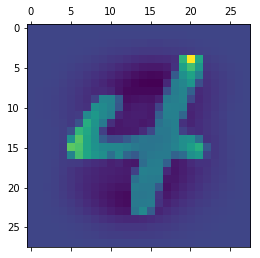

In [40]:
# Solution (Visualization)
%matplotlib inline

import matplotlib.pyplot as plt
plt.matshow(x_train[0].reshape(28,28))

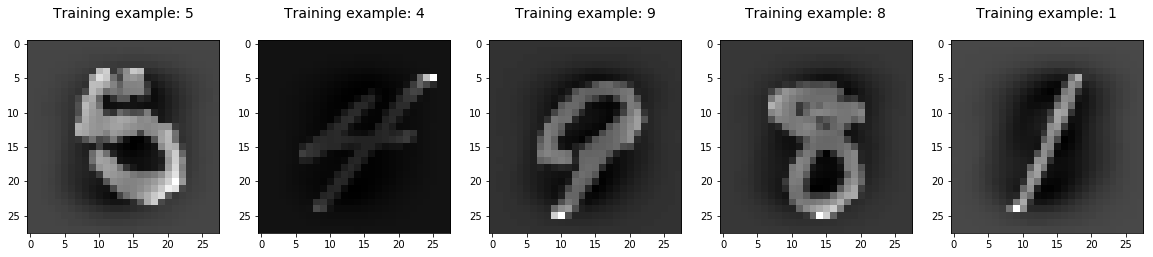

In [41]:
# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_train[5:10], y_train[5:10])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training example: %i\n' % label, fontsize = 14)

### Exercise 2.3: Logistic regression is one of the simplest linear classification algorithms. Fit a logistic regression model to the training images. Compute the accuracy of the classifier on the test images, and the time needed to train the model.¶

Hint: Use LogisticRegression from sklearn.linear_model. To increase speed, change the default solver to 'lbfgs'


In [47]:
# Solution

from time import time
from sklearn.linear_model import LogisticRegression

tic = time()
# Fit a regression model
clf = LogisticRegression(C=500. / y_train.size,
                         multi_class='multinomial',
                         penalty='l2', solver='lbfgs', tol=0.1)
clf.fit(x_train, y_train)

# Compute the classification score
train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)

toc = time()
print('The total time is %s seconds ' % (toc-tic))


The total time is 26.9030978679657 seconds 


In [48]:
print("train_score: ", train_score)
print("test_score: ", test_score)

train_score:  0.935933333333
test_score:  0.9224


### Exercise 2.4: Apply Principle Component Analysis (PCA) to the training signals by keeping only (a) 25%, (b) 75%, and (c) 95% of the energy. For each of the three cases, output the number of the required principle components.Then, plot the Cumulative Explained Variance over PCA. Finally, choose a random image from the dataset, and show its approximation with the PCA components. 

Hint: For computing the Cumulative Explained Variance over PCA use:
```
pca.explained_variance_ratio_.cumsum()

```

In [84]:
# Solution 
from sklearn.decomposition import PCA

# pcamodel that keeps eigenvectors that explains 95%
pca = PCA(0.95)
pca.fit(x_train)
# Compute the number of PCA components

print('PCA used %s components' %pca.n_components_)

PCA used 330 components


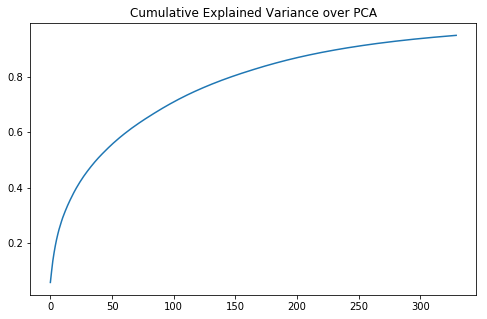

In [85]:
# Plot the Cumulative Explained Variance over PCA
plt.figure(figsize=(8, 5));
plt.title('Cumulative Explained Variance over PCA');
plt.plot(pca.explained_variance_ratio_.cumsum());


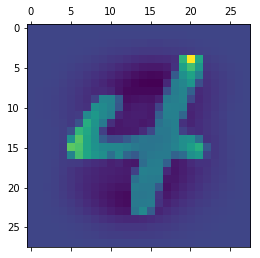

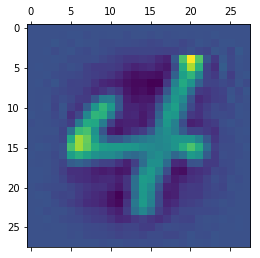

In [86]:
# Choose a random image from the dataset, and show its approximation with the PCA components

plt.figure(figsize=(8,4));

# Original Image
plt.matshow(x_train[0].reshape(28,28))

# Approximation
components = pca.transform(x_train)
approximation = pca.inverse_transform(components)
plt.matshow(approximation[0].reshape(28,28))


### Exercise 2.5: Fit a logistic regression model to the approximation of the training images with 95% of explained variance. Compute the accuracy of the classifier and the time needed to train the model. Compare it to the one obtained in 2.3. What do you observe? 


In [88]:
# Solution
#transform the x_test
test_components = pca.transform(x_test)
approx_test = pca.inverse_transform(test_components)

tic = time()
# Fit a regression model
clf = LogisticRegression(C=500. / y_train.size,
                         multi_class='multinomial',
                         penalty='l2', solver='lbfgs', tol=0.1)
clf.fit(approximation, y_train)

# Compute the classification score
train_score = clf.score(approximation, y_train)
test_score = clf.score(approx_test, y_test)

toc = time()
print('The total time is %s seconds' % (toc-tic))


The total time is 23.441051244735718 seconds


In [89]:
print("train_score: ", train_score)
print("test_score: ", test_score)

train_score:  0.931716666667
test_score:  0.9229


## Unsupervised learning with sklearn.cluster.KMeans()

###  Exercise 3.1: Generate a set of 6 isotropic Gaussian blobs, with 1000 samples each. Each sample should have 60 features. 

Hint: Use the sklearn.datasets.make_blobs to generate the data

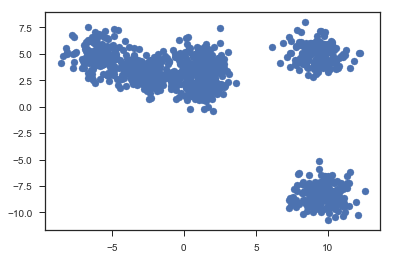

In [186]:
# Solution

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

# Generate the data
n_samples = 1000
n_features = 60
seed = 3
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=6, random_state=seed)
plt.scatter(X[:,0], X[:,1])
plt.show()


###  Exercise 3.2: Apply PCA to the generated data. Store the first two principle components and their cluster index to a new dataframe.  Visualize the 6 blobs based only on these two components. 

,dim1,dim2,id
0,-28.113128,9.777518,4
1,12.943406,-14.032937,0
2,12.025114,-13.906046,0


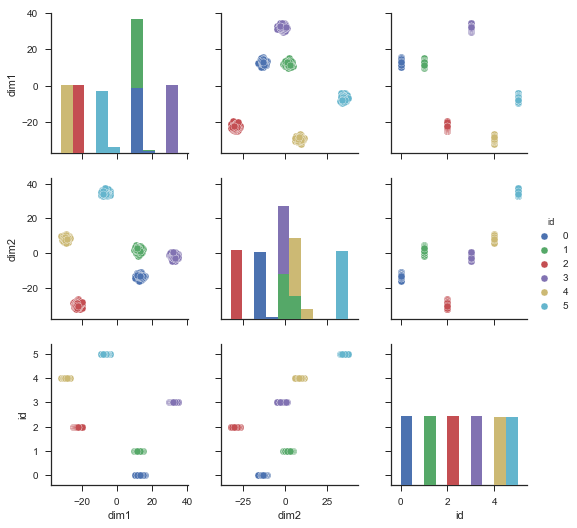

In [190]:
import seaborn as sns

# Fit PCA to the data
pca = PCA(2)
pca.fit(X)
X_trans = pca.transform(X)
# Generate a new dataframe and store the first two Principle Components and the true cluster index
df = pd.DataFrame(X_trans, columns=['dim1', 'dim2'])
df['id'] = pd.Series(y, index=df.index)
display(df.head(3))
# Vizualize the data by plotting their representation on the two Principle Components (x and y axis)
sns.pairplot(df, hue='id')

### Exercise 3.3: Set the number of clusters to 6 and apply Kmeans clustering to the data. Compute the accuracy score between the true labels and the ones estimated by the Kmeans algorithm. 

In [195]:
# Solution

from sklearn.cluster import KMeans

tic = time()
# Fit a Kmean model to the data
kmeans = KMeans(6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_true = y
from scipy.stats import mode

# Uncomment this part to compute the accuracy score
#  y_true: the true cluster index
#  y_kmeans: the cluster index assigned by Kmeans


labels = np.zeros_like(y_true)
for i in range(6):
    mask = (y_kmeans == i)
    labels[mask] = mode(y_true[mask])[0]
    
from sklearn.metrics import accuracy_score
print("accuracy score:", accuracy_score(y_true, labels))

toc = time()
print('The total time is %s seconds ' % (toc-tic))

accuracy score: 1.0
The total time is 0.08526301383972168 seconds 


### Exercise 3.4: Do the same by clustering the data using only the first 2 principle components. What do you observe? 

In [196]:
# Solution

from sklearn.cluster import KMeans

tic = time()
# Fit a Kmean model to the data
kmeans = KMeans(6)
kmeans.fit(X_trans)
y_kmeans = kmeans.predict(X_trans)
y_true = y
from scipy.stats import mode

# Uncomment this part to compute the accuracy score
#  y_true: the true cluster index
#  y_kmeans: the cluster index assigned by Kmeans


labels = np.zeros_like(y_true)
for i in range(6):
    mask = (y_kmeans == i)
    labels[mask] = mode(y_true[mask])[0]
    
from sklearn.metrics import accuracy_score
print("accuracy score:", accuracy_score(y_true, labels))

toc = time()

print('The total time is %s seconds ' % (toc-tic))

accuracy score: 1.0
The total time is 0.04033994674682617 seconds 
